### Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

### Loading Dataset

In [2]:
df = pd.read_csv('C:/Data/spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Data preprocessing and data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.drop(columns = ['Unnamed: 0', 'label'], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


In [7]:
df.rename(columns = {'label_num':'result'}, inplace = True)

In [8]:
df

,text,result
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [9]:
df.isnull().sum()

text      0
result    0
dtype: int64

In [10]:
df.duplicated().sum()

178

In [11]:
df = df.drop_duplicates(keep = 'first')

In [12]:
df.duplicated().sum()

0

In [13]:
df['result'].value_counts()

0    3531
1    1462
Name: result, dtype: int64

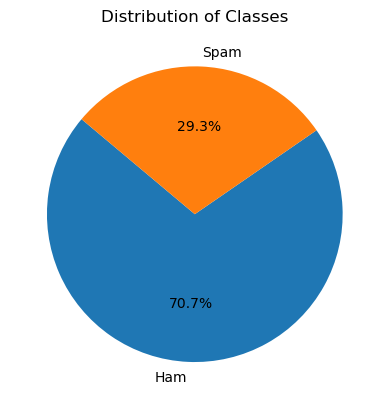

In [14]:
value_counts = df['result'].value_counts()

plt.pie(value_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')

plt.show()

### Data tokenization

In [15]:
df = df.copy()
df['num_characters'] = df['text'].apply(len)


In [16]:
df.head()

,text,result,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [17]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,text,result,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [21]:
# ham
df[df['result'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [22]:
#spam
df[df['result'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


### Data visualization and statistical anlaysis

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

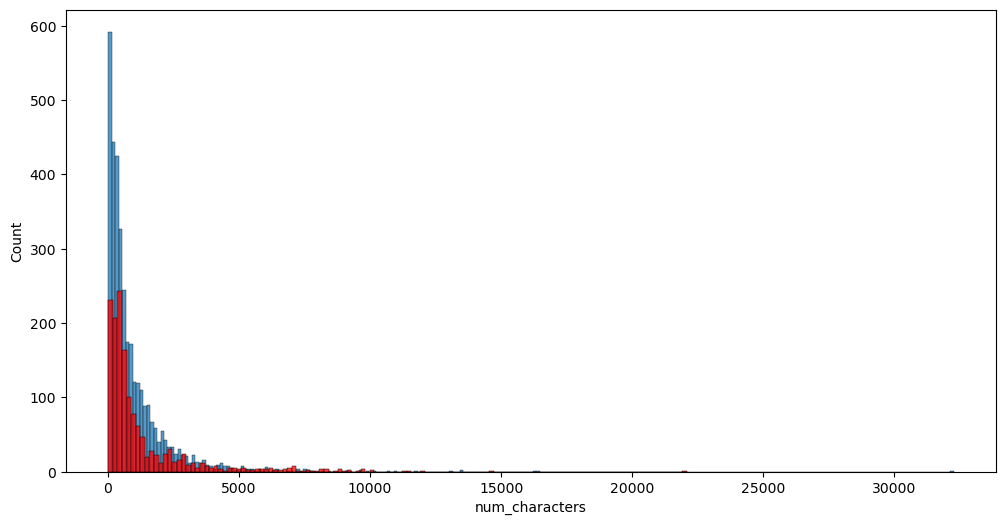

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['num_characters'])
sns.histplot(df[df['result'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

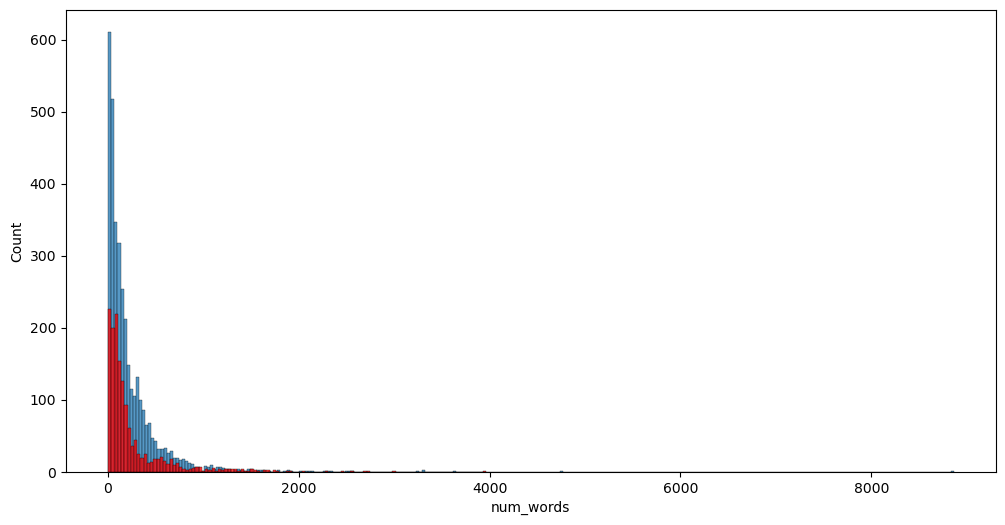

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['result'] == 0]['num_words'])
sns.histplot(df[df['result'] == 1]['num_words'],color='red')

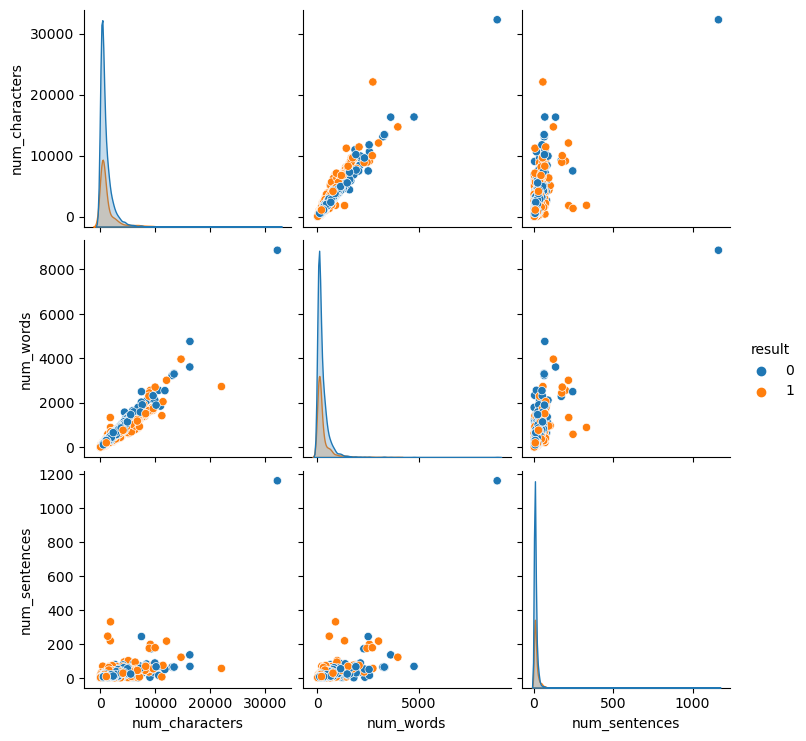

In [25]:
sns.pairplot(df,hue='result')

<AxesSubplot:>

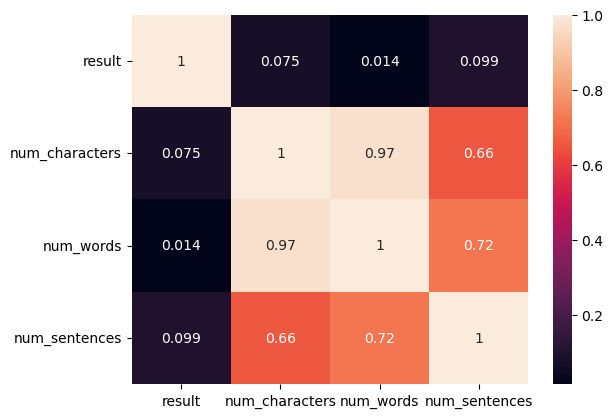

In [26]:
sns.heatmap(df.corr(),annot=True)

### Data tokenization


Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()

    words = nltk.word_tokenize(text)

    words = [i for i in words if i.isalnum()]

    stop_words = set(stopwords.words('english'))
    words = [i for i in words if i not in stop_words and i not in string.punctuation]

    ps = PorterStemmer()
    words = [ps.stem(i) for i in words]

    result = " ".join(words)

    return result

In [29]:
df['text'][5170]


'Subject: important online banking alert\r\ndear valued citizensr bank member ,\r\ndue to concerns , for the safety and integrity of the online banking community we have issued the following warning message .\r\nit has come to our attention that your citizensr bank account information needs to be updated as part of our continuing commitment to protect your account and to reduce the instance of fraud on our website . if you could please take 5 - 10 minutes out of your online experience and renew your records you will not run into any future problems with the online service . however , failure to confirm your records may result in your account suspension .\r\nonce you have confirmed your account records your internet banking service will not be interrupted and will continue as normal .\r\nto confirm your bank account records please click here .\r\nnote :\r\nthis e - mail was sent on behalf of the online banking community , if you do not have an online banking account with charterr one th

In [30]:
transform_text('Subject: important online banking alert\r\ndear valued citizensr bank member ,\r\ndue to concerns , for the safety and integrity of the online banking community we have issued the following warning message .\r\nit has come to our attention that your citizensr bank account information needs to be updated as part of our continuing commitment to protect your account and to reduce the instance of fraud on our website . if you could please take 5 - 10 minutes out of your online experience and renew your records you will not run into any future problems with the online service . however , failure to confirm your records may result in your account suspension .\r\nonce you have confirmed your account records your internet banking service will not be interrupted and will continue as normal .\r\nto confirm your bank account records please click here .\r\nnote :\r\nthis e - mail was sent on behalf of the online banking community , if you do not have an online banking account with charterr one then this message does not apply to you and you may ignore this message .\r\nthank you for your time ,\r\ncitizensr financial group .\r\n')

'subject import onlin bank alert dear valu citizensr bank member due concern safeti integr onlin bank commun issu follow warn messag come attent citizensr bank account inform need updat part continu commit protect account reduc instanc fraud websit could pleas take 5 10 minut onlin experi renew record run futur problem onlin servic howev failur confirm record may result account suspens confirm account record internet bank servic interrupt continu normal confirm bank account record pleas click note e mail sent behalf onlin bank commun onlin bank account charterr one messag appli may ignor messag thank time citizensr financi group'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,text,result,num_characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
spam_wc = wc.generate(df[df['result'] == 1]['transformed_text'].str.cat(sep=" "))

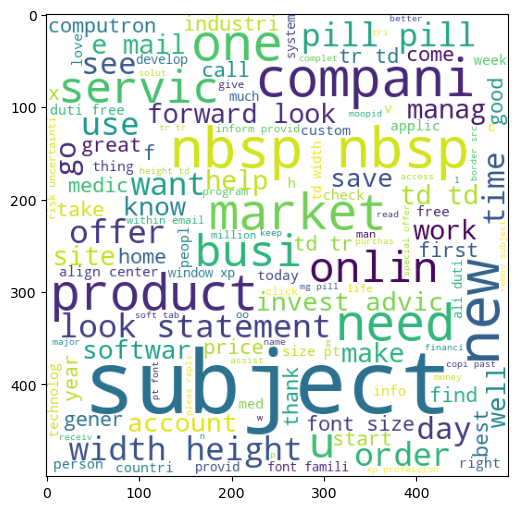

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(df[df['result'] == 0]['transformed_text'].str.cat(sep=" "))

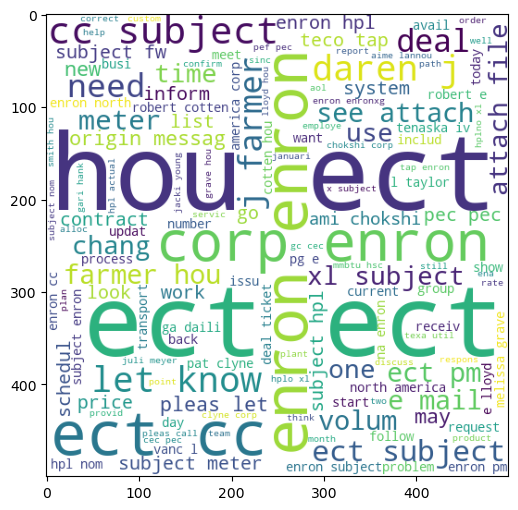

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['result'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [40]:
len(spam_corpus)

196592

C:\Users\avesk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


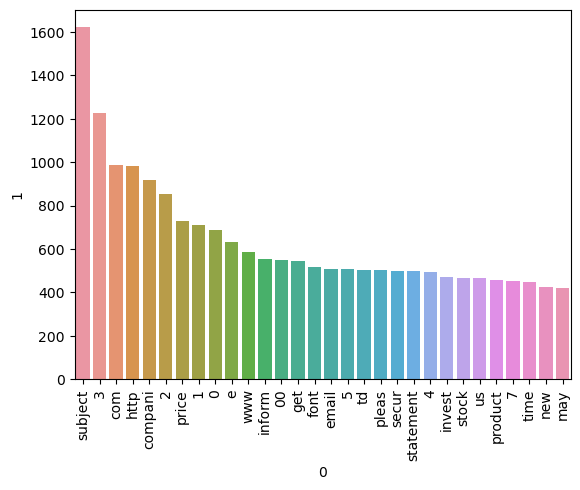

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['result'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

380475

C:\Users\avesk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


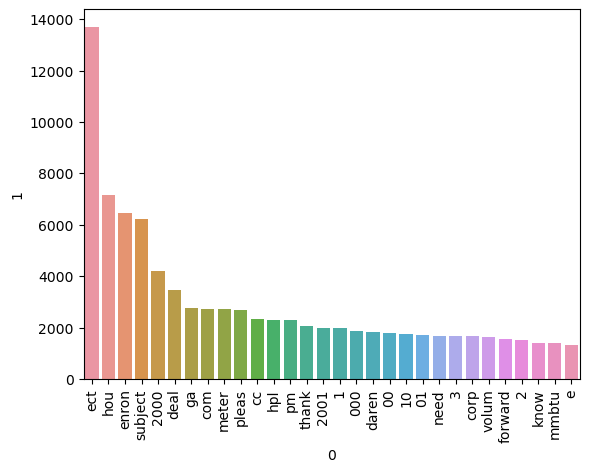

In [44]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [46]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(4993, 3000)

In [48]:
y = df['result'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9579579579579579
[[678  19]
 [ 23 279]]
0.9362416107382551


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9319319319319319
[[648  49]
 [ 19 283]]
0.8524096385542169


In [55]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9039039039039038
[[645  52]
 [ 44 258]]
0.832258064516129


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.980980980980981, 0.9639344262295082)

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.980980980980981
Precision -  0.9639344262295082


C:\Users\avesk\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.953953953953954
Precision -  0.9295302013422819
For  NB
Accuracy -  0.9319319319319319
Precision -  0.8524096385542169
For  DT
Accuracy -  0.8448448448448449
Precision -  0.6681922196796338
For  LR
Accuracy -  0.955955955955956
Precision -  0.9056603773584906
For  RF
Accuracy -  0.965965965965966
Precision -  0.935064935064935
For  AdaBoost
Accuracy -  0.948948948948949
Precision -  0.8934169278996865
For  BgC
Accuracy -  0.9419419419419419
Precision -  0.8836477987421384
For  ETC
Accuracy -  0.978978978978979
Precision -  0.9576547231270358
For  GBDT
Accuracy -  0.9359359359359359
Precision -  0.9219858156028369
For  xgb
Accuracy -  0.963963963963964
Precision -  0.9182389937106918


In [62]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [63]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.980981,0.963934
8,ETC,0.978979,0.957655
5,RF,0.965966,0.935065
1,KN,0.953954,0.929530
9,GBDT,0.935936,0.921986
10,xgb,0.963964,0.918239
4,LR,0.955956,0.905660
6,AdaBoost,0.948949,0.893417
7,BgC,0.941942,0.883648
2,NB,0.931932,0.852410


In [64]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [65]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [66]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [67]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [68]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [69]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.980981,0.963934,0.980981,0.963934,0.980981,0.963934,0.980981,0.963934
1,ETC,0.978979,0.957655,0.978979,0.957655,0.978979,0.957655,0.978979,0.957655
2,RF,0.965966,0.935065,0.965966,0.935065,0.965966,0.935065,0.965966,0.935065
3,KN,0.953954,0.929530,0.953954,0.929530,0.953954,0.929530,0.953954,0.929530
4,GBDT,0.935936,0.921986,0.935936,0.921986,0.935936,0.921986,0.935936,0.921986
5,xgb,0.963964,0.918239,0.963964,0.918239,0.963964,0.918239,0.963964,0.918239
6,LR,0.955956,0.905660,0.955956,0.905660,0.955956,0.905660,0.955956,0.905660
7,AdaBoost,0.948949,0.893417,0.948949,0.893417,0.948949,0.893417,0.948949,0.893417
8,BgC,0.941942,0.883648,0.941942,0.883648,0.941942,0.883648,0.941942,0.883648
9,NB,0.931932,0.852410,0.931932,0.852410,0.931932,0.852410,0.931932,0.852410


In [70]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [71]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.983983983983984
Precision 0.9703947368421053


In [72]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [73]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.980980980980981
Precision 0.9732441471571907


### Model deployment

In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [75]:
pip install streamlit

In [81]:
import streamlit as st

def transform_text(text):
    text = text.lower()

    words = nltk.word_tokenize(text)

    words = [i for i in words if i.isalnum()]

    stop_words = set(stopwords.words('english'))
    words = [i for i in words if i not in stop_words and i not in string.punctuation]

    ps = PorterStemmer()
    words = [ps.stem(i) for i in words]

    result = " ".join(words)

    return result

tfidf = pickle.load(open('vectorizer.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

st.title("Email/SMS Spam Classifier")

input_email = st.text_input("Enter Your Message")

#1: preprocess
transformed_mail = transform_text(input_email)

#2: vectorize
vector_input = tfidf.transform([transformed_mail])

#3: Predict
result = model.predict(vector_input)[0]

#4: Display
if result == 1:
    st.header('Spam')
else:
    st.header('Not Spam')
    